# Árboles de decisión 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

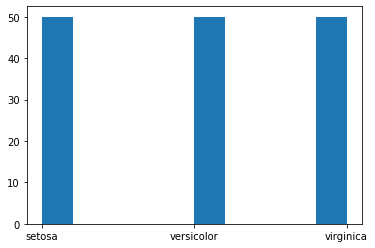

In [4]:
plt.hist(data.Species)

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [8]:
data["is_train"] = np.random.uniform(0,1,len(data))<=.75

In [11]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [12]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [13]:
print(train.shape, test.shape)

(105, 6) (45, 6)


In [3]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
tree = DecisionTreeClassifier(criterion="entropy",min_samples_split=20,random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [17]:
preds = tree.predict(test[predictors])

In [18]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,10,0,0
versicolor,0,19,0
virginica,0,4,12


# Visualización de Árbol de decisión

In [2]:
from sklearn.tree import export_graphviz

In [21]:
with open("../resources/iris_dtree.dot","w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [3]:
import os
from graphviz import Source

In [4]:
file = open("../resources/iris_dtree.dot", "r")
text = file.read()

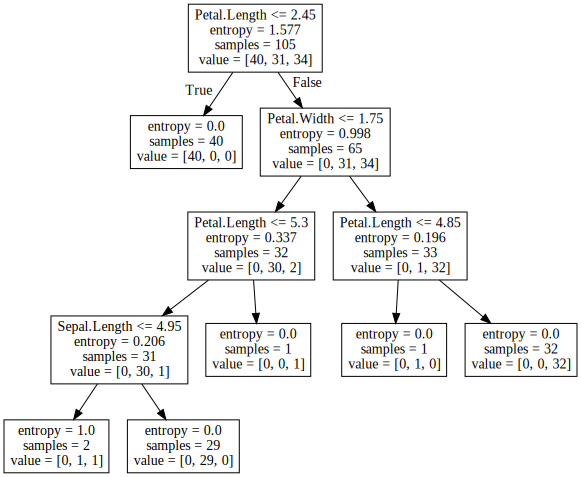

In [5]:
Source(text)

# Cross Validation para la poda

In [5]:
X = data[predictors]
Y = data[target]

In [6]:
tree = DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_split=20,random_state=99)
tree.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [7]:
from sklearn.cross_validation import KFold

C:\Users\pablo\anaconda3\envs\dl_env\lib\site-packages\sklearn\cross_validation.py:37: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  warnings.warn("This module was deprecated in version 0.18 in favor of the "


In [8]:
cv = KFold(n = X.shape[0], n_folds=10, shuffle=True, random_state=1)

In [9]:
from sklearn.cross_validation import cross_val_score

In [10]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1)

In [11]:
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [12]:
score = np.mean(scores)
score

0.9333333333333333

In [14]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy",max_depth=i,min_samples_split=20,random_state=99)
    tree.fit(X, Y)
    cv = KFold(n = X.shape[0], n_folds=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1)
    score = np.mean(scores)
    print("Score {} para i = {}".format(score, i))

Score 0.5666666666666667 para i = 1
Score 0.9200000000000002 para i = 2
Score 0.9400000000000001 para i = 3
Score 0.9333333333333333 para i = 4
Score 0.9333333333333333 para i = 5
Score 0.9333333333333333 para i = 6
Score 0.9333333333333333 para i = 7
Score 0.9333333333333333 para i = 8
Score 0.9333333333333333 para i = 9
Score 0.9333333333333333 para i = 10


# Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
X = data[predictors]
Y = data[target]

In [7]:
forest = RandomForestClassifier(n_jobs=2,oob_score=True,n_estimators=500)
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [8]:
forest.oob_score_

0.96